# YouTube Link - https://youtu.be/P7gRmcb7y8Q

# **Import Dataset**

In [0]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

#Mount your Google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import fileinput

filePath ="/content/gdrive/My Drive/3253 Data Science/Framingham Dataset/framingham.csv"

with fileinput.FileInput(filePath, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", ";"), end='')

In [0]:
# Create dataframe
import pandas as pd
data = pd.read_csv(filePath, sep=";", index_col=0)

In [0]:
data.shape

(4240, 15)

# **Take a look at the dataset**

In [0]:
data.describe()

age    education  ...      glucose   TenYearCHD
count  4240.000000  4135.000000  ...  3852.000000  4240.000000
mean     49.580189     1.979444  ...    81.963655     0.151887
std       8.572942     1.019791  ...    23.954335     0.358953
min      32.000000     1.000000  ...    40.000000     0.000000
25%      42.000000     1.000000  ...    71.000000     0.000000
50%      49.000000     2.000000  ...    78.000000     0.000000
75%      56.000000     3.000000  ...    87.000000     0.000000
max      70.000000     4.000000  ...   394.000000     1.000000

[8 rows x 15 columns]

In [0]:
data

age  education  currentSmoker  ...  heartRate  glucose  TenYearCHD
male                                 ...                                
1      39        4.0              0  ...       80.0     77.0           0
0      46        2.0              0  ...       95.0     76.0           0
1      48        1.0              1  ...       75.0     70.0           0
0      61        3.0              1  ...       65.0    103.0           1
0      46        3.0              1  ...       85.0     85.0           0
0      43        2.0              0  ...       77.0     99.0           0
0      63        1.0              0  ...       60.0     85.0           1
0      45        2.0              1  ...       79.0     78.0           0
1      52        1.0              0  ...       76.0     79.0           0
1      43        1.0              1  ...       93.0     88.0           0
0      50        1.0              0  ...       75.0     76.0           0
0      43        2.0              0  ...       72.0     61.0           0
1      46        1.0              1  ...       98.0     64.0           0
0      41        3.0              0  ...       65.0     84.0           0
0      39        2.0              1  ...       85.0      NaN           0
0      38        2.0              1  ...       95.0     70.0           1
1      48        3.0              1  ...       64.0     72.0           0
0      46        2.0              1  ...       80.0     89.0           1
0      38        2.0              1  ...       75.0     78.0           0
1      41        2.0              0  ...       85.0     65.0           0
0      42        2.0              1  ...       72.0     85.0           0
0      43        1.0              0  ...       70.0      NaN           0
0      52        1.0              0  ...       70.0    113.0           0
0      52        3.0              1  ...       71.0     75.0           0
1      44        2.0              1  ...       75.0     83.0           0
1      47        4.0              1  ...       62.0     66.0           1
0      60        1.0              0  ...       65.0      NaN           0
1      35        2.0              1  ...       73.0     83.0           0
0      61        3.0              0  ...       85.0     65.0           1
0      60        1.0              0  ...       72.0     74.0           0
...   ...        ...            ...  ...        ...      ...         ...
1      50        1.0              0  ...       85.0     87.0           0
1      42        2.0              1  ...       65.0     69.0           0
1      48        2.0              1  ...       84.0     60.0           0
1      48        2.0              0  ...       75.0     84.0           1
0      56        3.0              1  ...       76.0     87.0           1
0      63        1.0              0  ...       78.0     79.0           0
0      59        3.0              1  ...       70.0     70.0           0
0      63        1.0              0  ...       95.0     94.0           0
0      52        1.0              0  ...       72.0     86.0           0
1      48        1.0              0  ...       65.0     75.0           0
1      60        1.0              0  ...       75.0     70.0           1
1      50        1.0              0  ...       80.0     72.0           1
1      53        3.0              0  ...       70.0     63.0           0
1      56        4.0              0  ...       90.0     75.0           1
1      47        2.0              1  ...       75.0     76.0           0
1      45        4.0              1  ...       83.0    105.0           0
1      58        1.0              0  ...       67.0     76.0           1
1      43        4.0              1  ...       80.0     75.0           0
0      50        1.0              0  ...       85.0    260.0           0
0      51        3.0              1  ...       75.0      NaN           0
0      56        1.0              1  ...       57.0      NaN           0
1      58        3.0              0  ...       80.0     81.0    

In [0]:
#see if there are any missing values in the dataset
data.isnull().sum()

age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
#drop the missing data
data.dropna(axis=0,inplace=True)


In [0]:
#check the drop worked 
data.isnull().sum()


age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [0]:
#look at the dataset again
data.describe()

age    education  ...      glucose   TenYearCHD
count  3658.000000  3658.000000  ...  3658.000000  3658.000000
mean     49.551941     1.980317  ...    81.852925     0.152269
std       8.562029     1.022656  ...    23.904164     0.359331
min      32.000000     1.000000  ...    40.000000     0.000000
25%      42.000000     1.000000  ...    71.000000     0.000000
50%      49.000000     2.000000  ...    78.000000     0.000000
75%      56.000000     3.000000  ...    87.000000     0.000000
max      70.000000     4.000000  ...   394.000000     1.000000

[8 rows x 15 columns]

# **Exploratory Analysis**

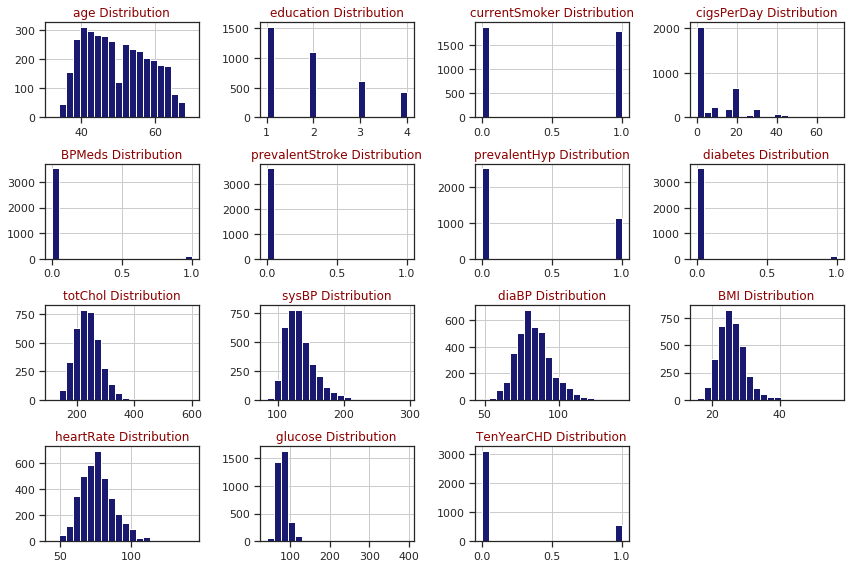

In [0]:
#using historigrams, see what the distribution is like in the dataset by each data element

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(12,8))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns, 4, 4)

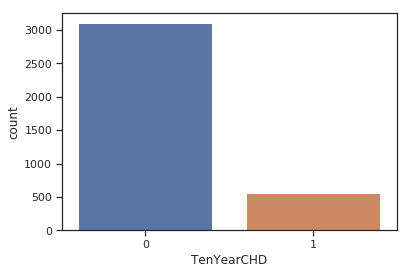

In [0]:
data.TenYearCHD.value_counts()
sns.countplot(x='TenYearCHD',data=data)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


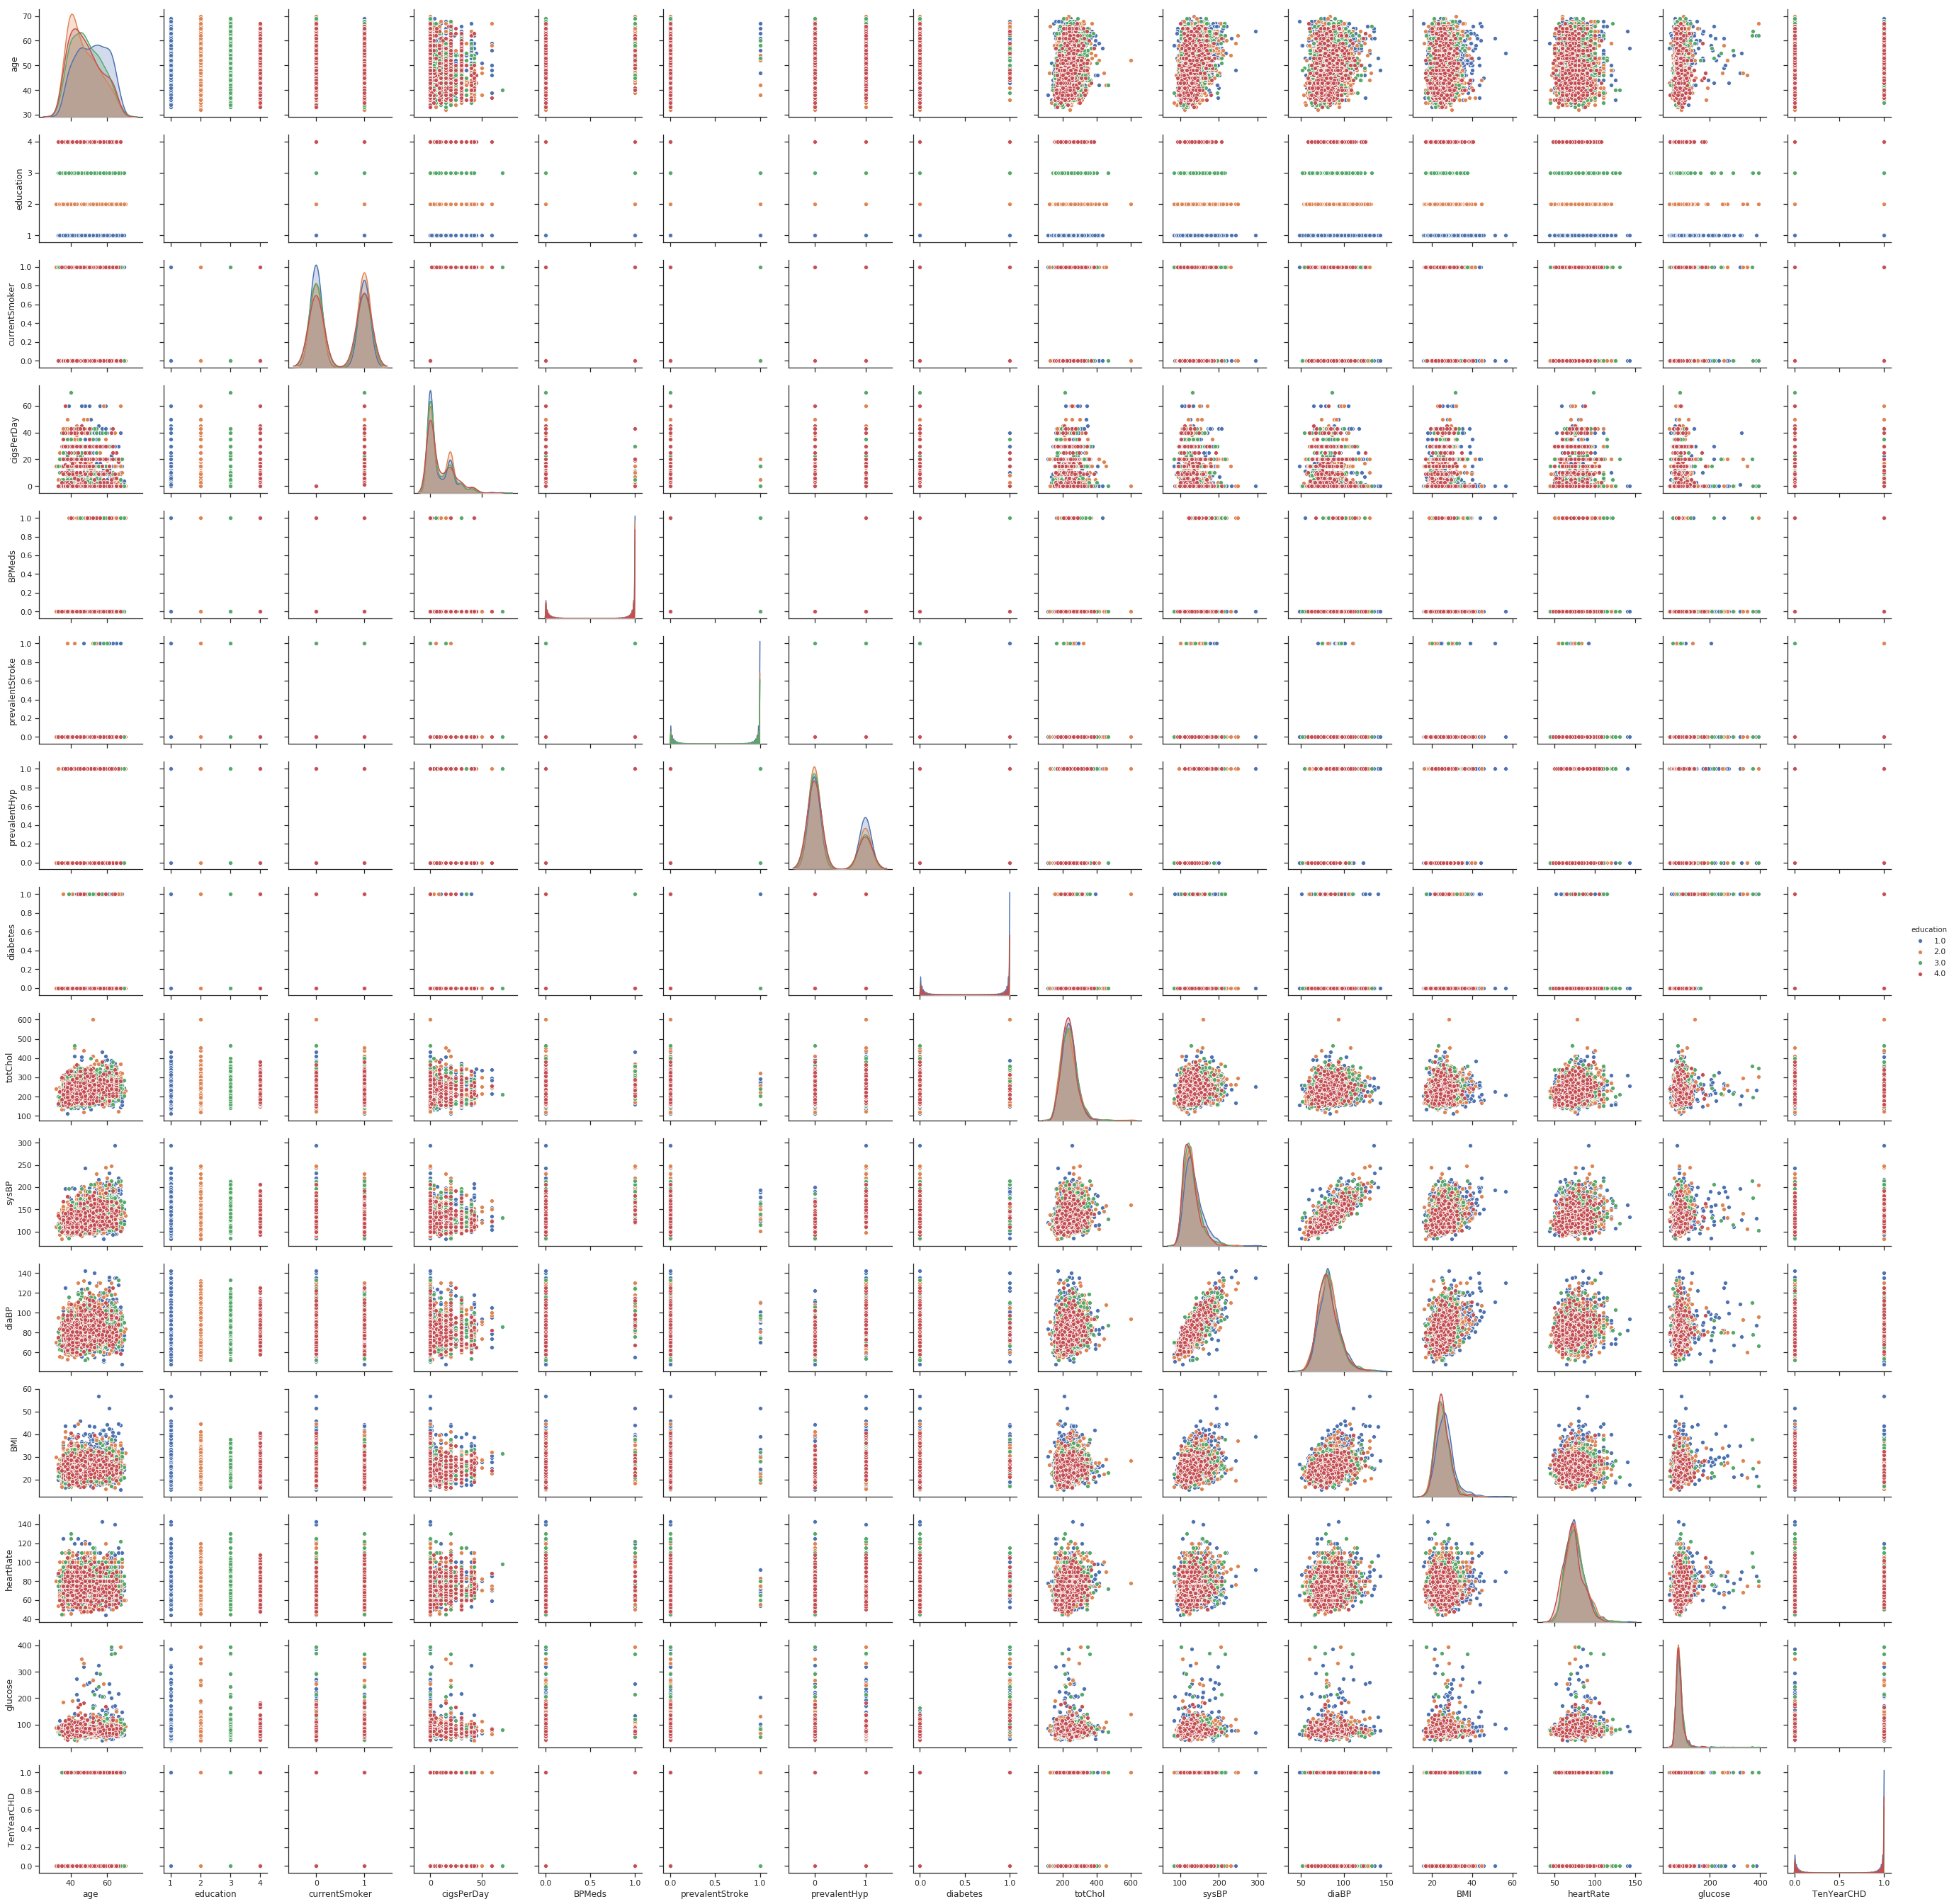

In [0]:
#using seaborn's pairplot, this is another way to see what the distributions and relationships are
#the intent of this is to see VISUALLY if there are any relationships
import seaborn as sns
sns.set(style="ticks")

# df = sns.load_dataset("data")
sns.pairplot(data=data, hue="education")

####Education above was picked as a starting point to see if there are any relationships above. This would have made the plot above more meaningful, and would be the differentiating factor compared to the histogram, which looked at the distribution per data element. Education was picked to show different colours with, because an assumption was made that education would have an impact on a patient's health. Studies show that socioeconomic status (i.e. wealth, education, neighbourhood, race, social determinants of health) has an effect on someone's health, with those with lesser education having poorer health.

####Looking at the plot above, by using education as the differentiating factor (i.e. the graphs are separated by different education levels, betwen years of 1-4 of education), we can see that there are some risk factors that have relationships with education. For example, smoking (smoker and cigsperday) increases with more patients with less years of education. This can be determined as we can see more red dots towards the origin (x=0, y=0), which indicators as a nil for that risk factor. 

####We can conclude that education level has a factor on heart disease, and we can dive deeper to see what relationships education has. This elements identified will be considered for the training model.

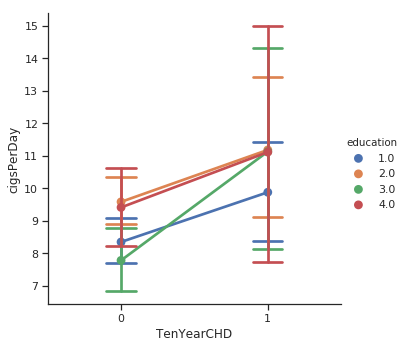

In [0]:
#deep diver to see what other relationships education has
#data elements with a strong relationship with education will be considered for the training model
g = sns.catplot(x="TenYearCHD", y="cigsPerDay", hue="education", 
                capsize=.2, kind="point", data=data)

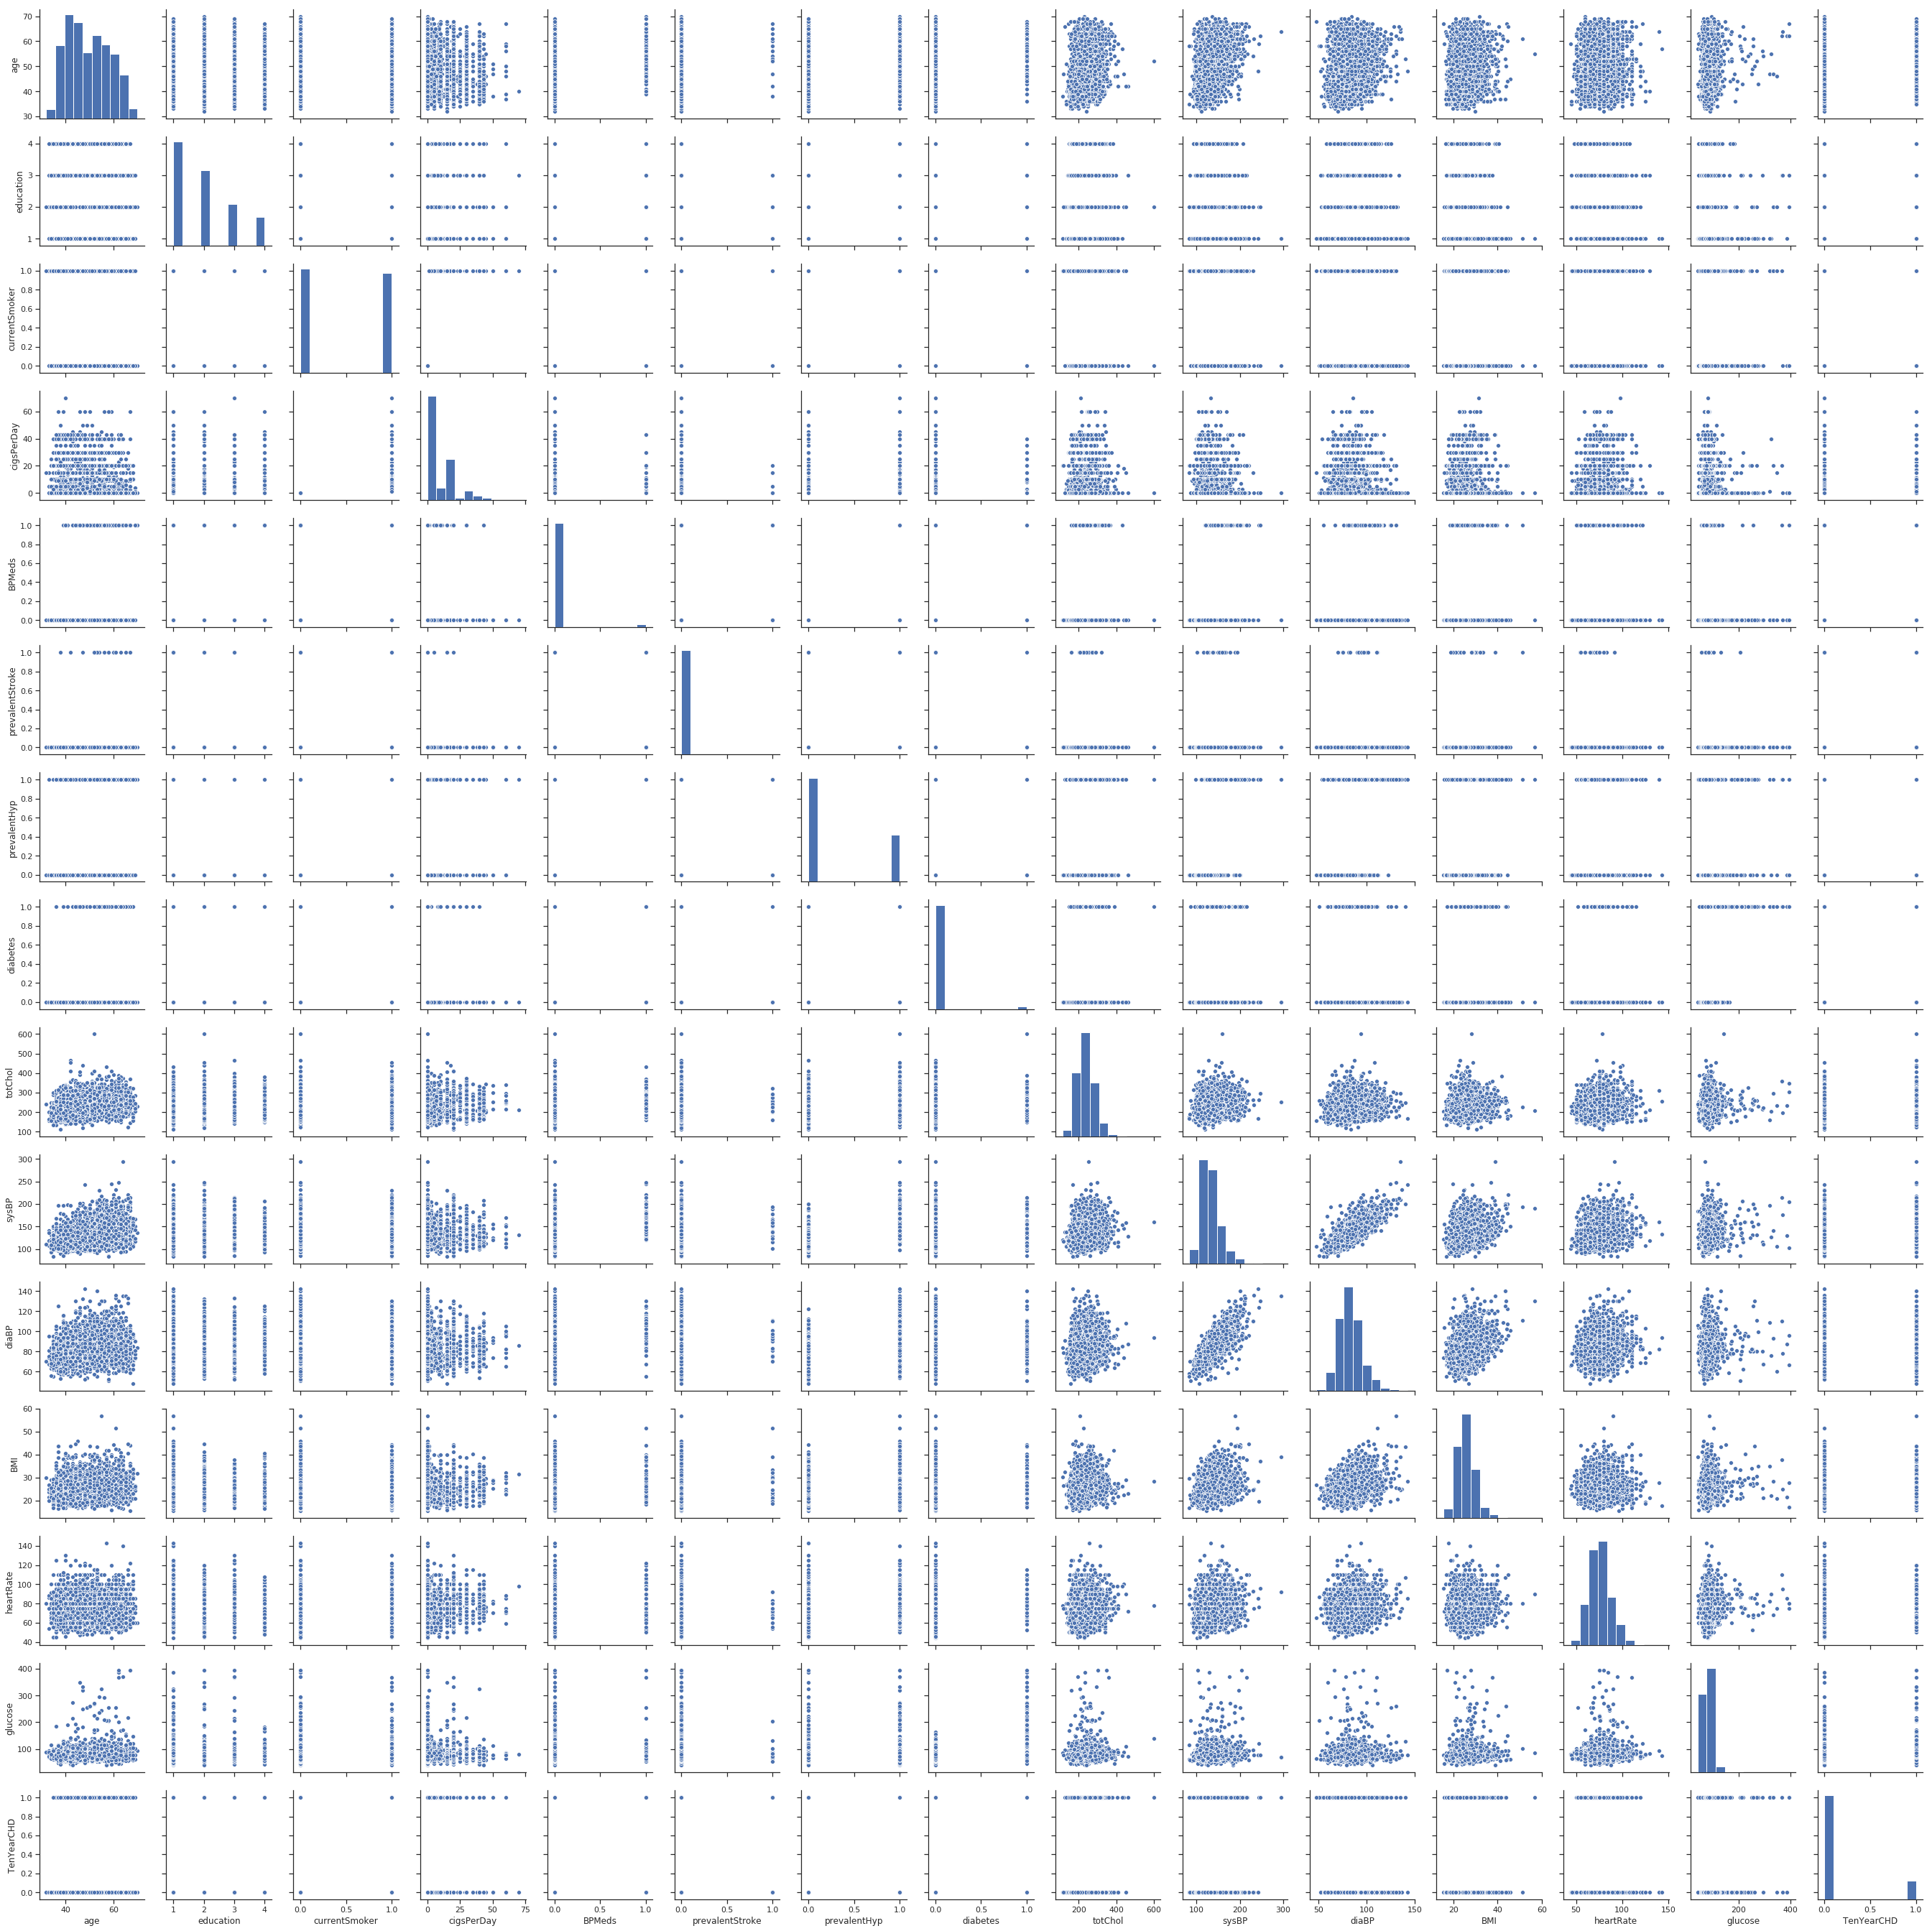

In [0]:
sns.pairplot(data=data)

**I could not find any relationships with education, so let's try a correlation heat map to see what the relationship are between 2 variables**

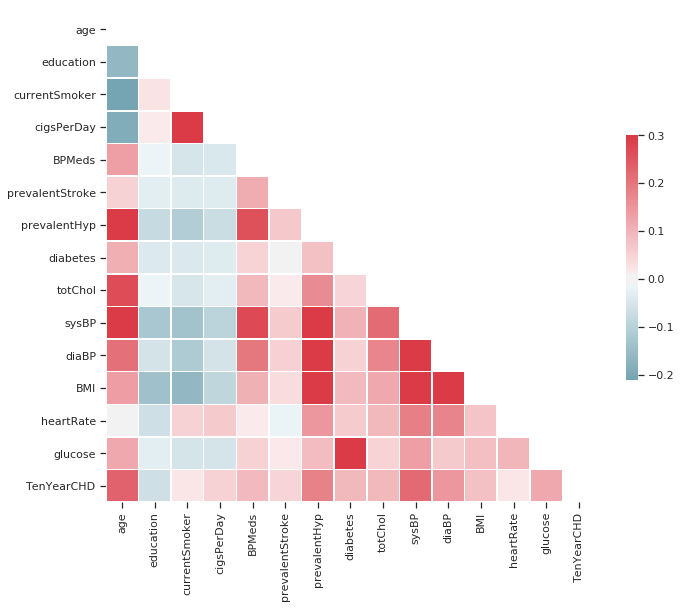

In [0]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
#data feature engineer some new data elements that are highly correlated with TenYear CHD
data['ed_smoke_cigs'] =  data["education"] + data["currentSmoker"] + data["cigsPerDay"]
data['age_hyp_sys'] =  data["age"] + data["prevalentHyp"] + data["sysBP"]
data['age_meds'] =  data["age"] + data["BPMeds"] 

In [0]:
data.describe()


age    education  ...  age_hyp_sys     age_meds
count  3658.000000  3658.000000  ...  3658.000000  3658.000000
mean     49.551941     1.980317  ...   182.234144    49.582285
std       8.562029     1.022656  ...    26.924096     8.586826
min      32.000000     1.000000  ...   118.500000    32.000000
25%      42.000000     1.000000  ...   162.625000    42.000000
50%      49.000000     2.000000  ...   178.000000    49.000000
75%      56.000000     3.000000  ...   197.000000    56.000000
max      70.000000     4.000000  ...   360.000000    71.000000

[8 rows x 18 columns]

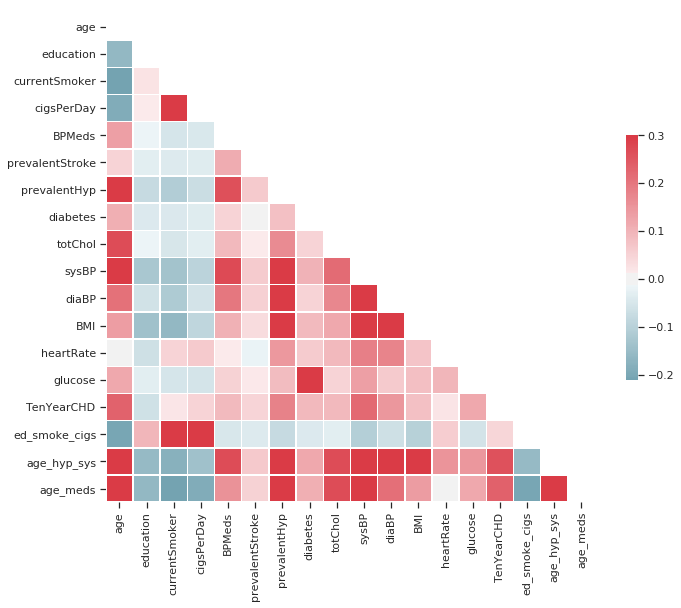

In [0]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Drop un-needed data/columns

In [0]:
#drop the poorly correlated data with tenyearCHD
# data.drop(['education'],axis=1,inplace=True)
# data.drop(['currentSmoker'],axis=1,inplace=True)
# data.drop(['heartRate'],axis=1,inplace=True)



In [0]:
data.describe()

age    education  ...  age_hyp_sys     age_meds
count  3658.000000  3658.000000  ...  3658.000000  3658.000000
mean     49.551941     1.980317  ...   182.234144    49.582285
std       8.562029     1.022656  ...    26.924096     8.586826
min      32.000000     1.000000  ...   118.500000    32.000000
25%      42.000000     1.000000  ...   162.625000    42.000000
50%      49.000000     2.000000  ...   178.000000    49.000000
75%      56.000000     3.000000  ...   197.000000    56.000000
max      70.000000     4.000000  ...   360.000000    71.000000

[8 rows x 18 columns]

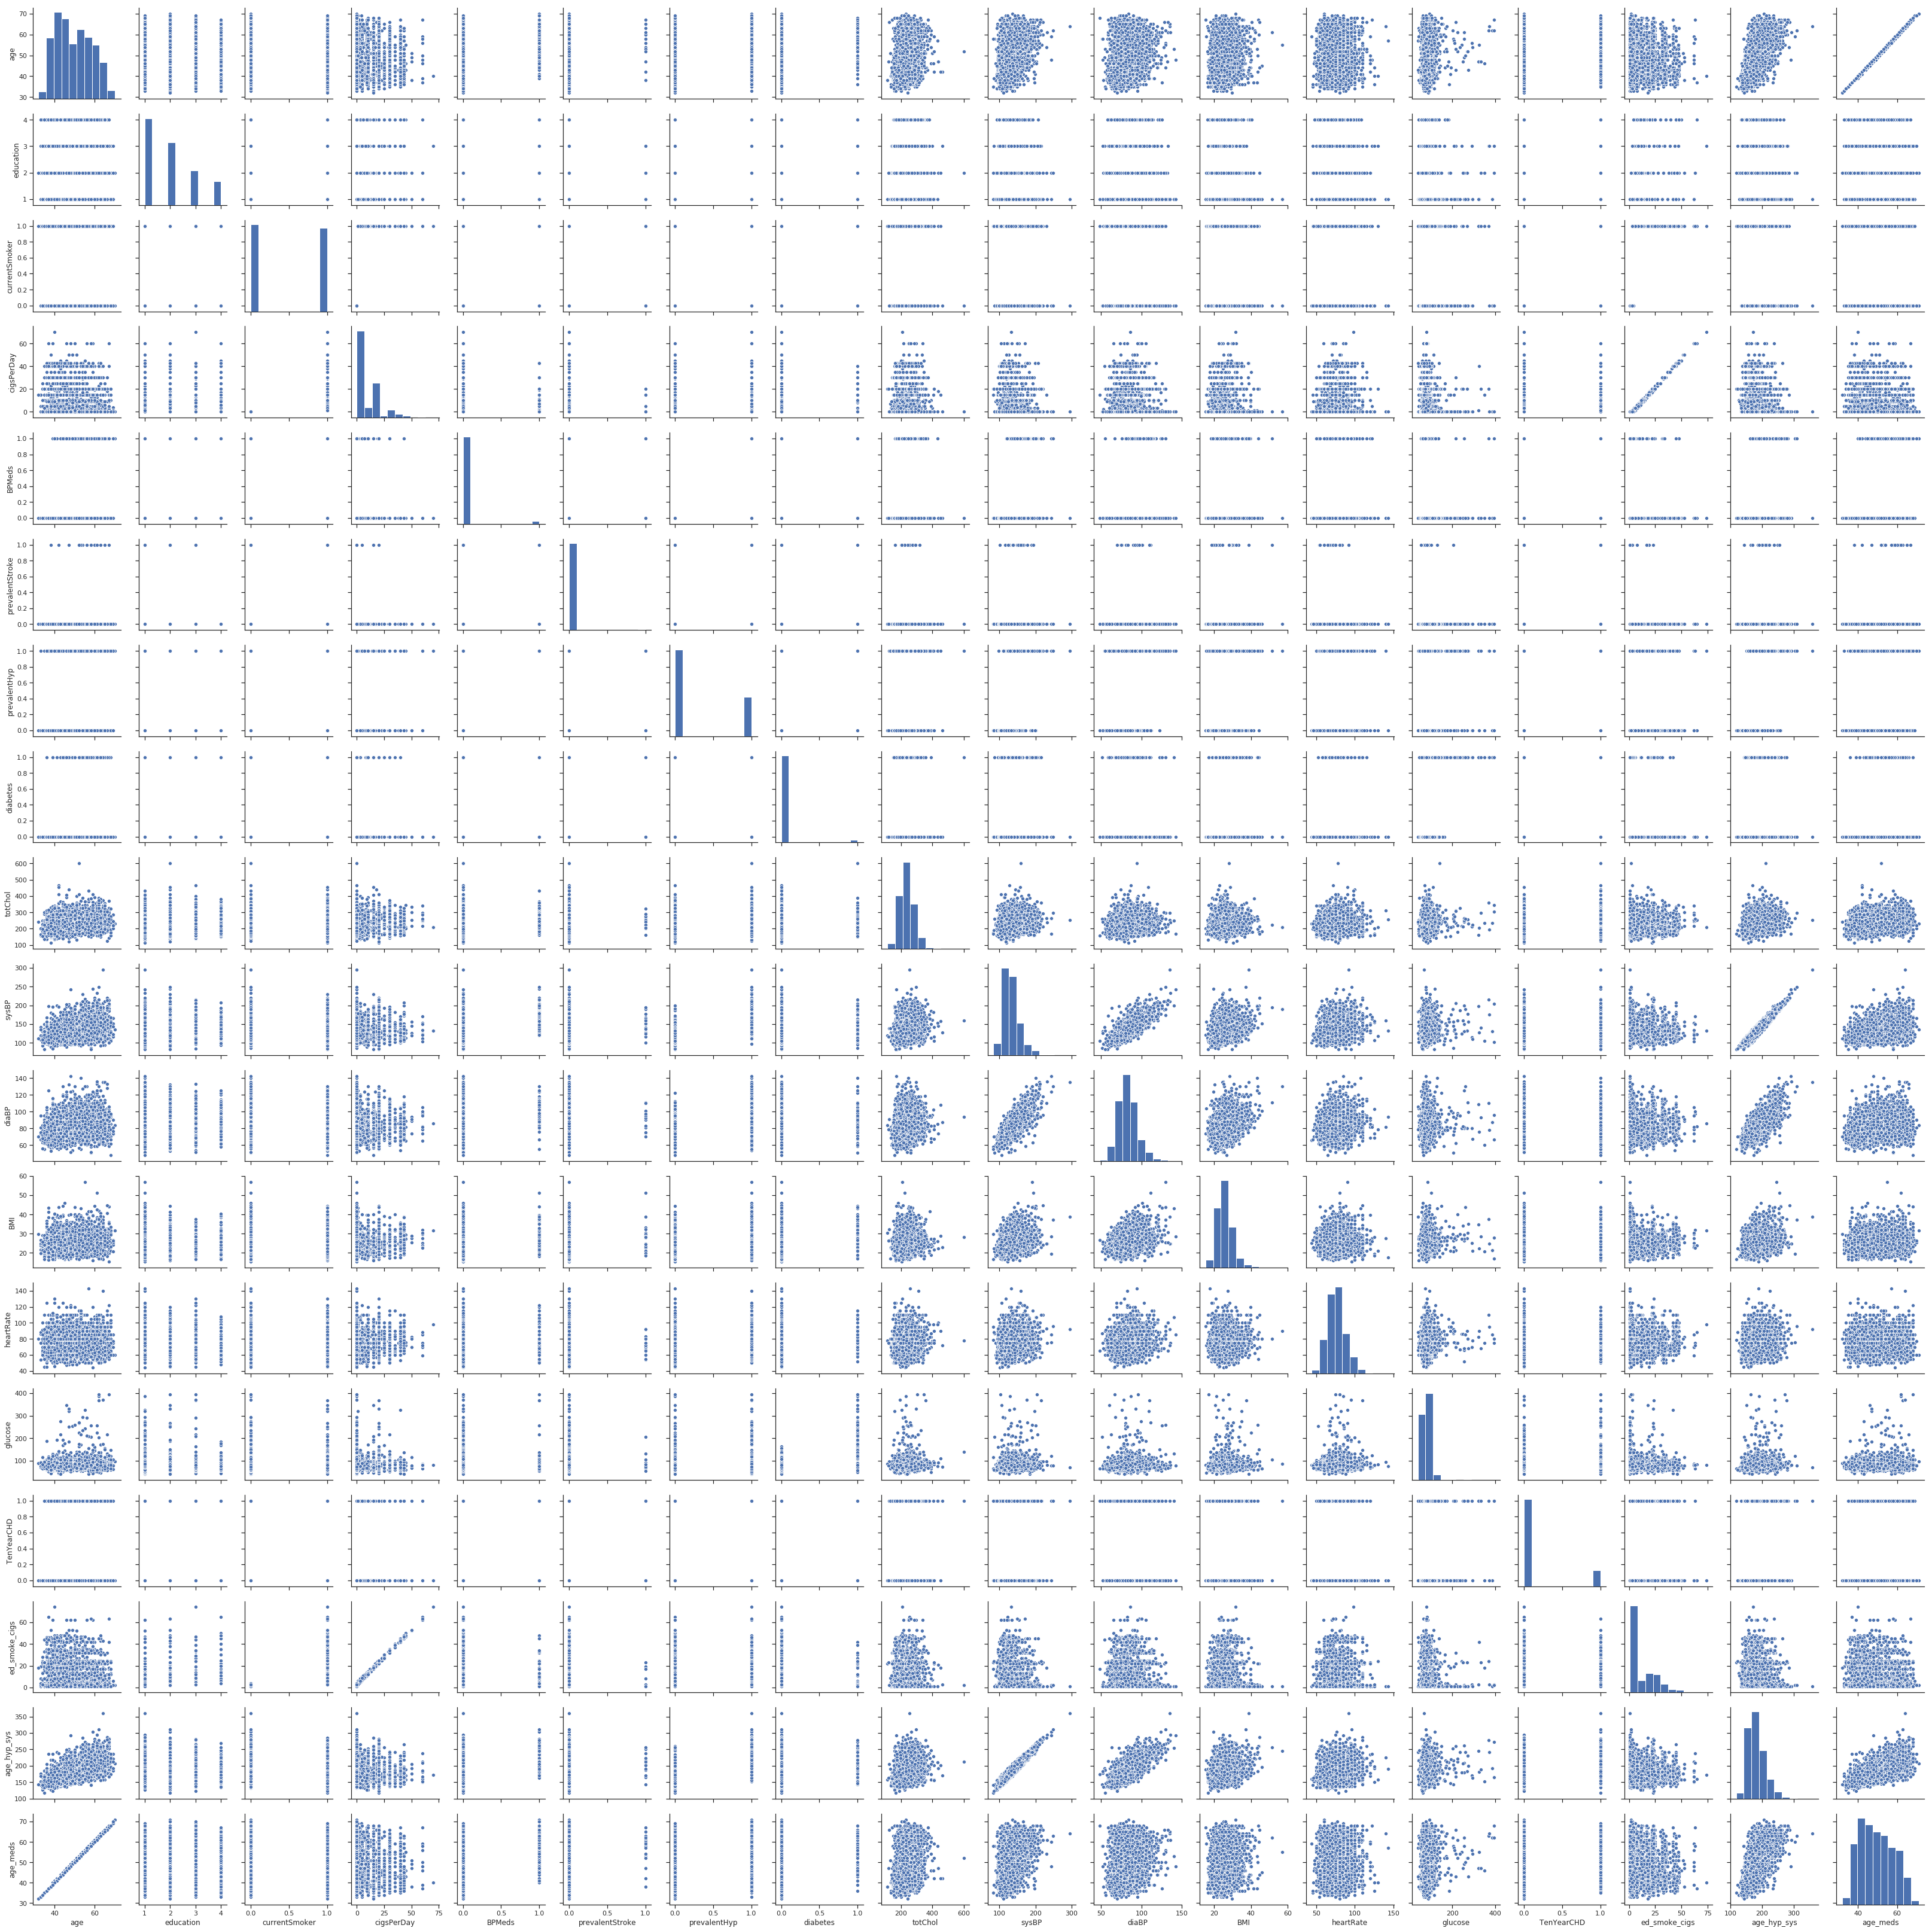

In [0]:
sns.pairplot(data=data)


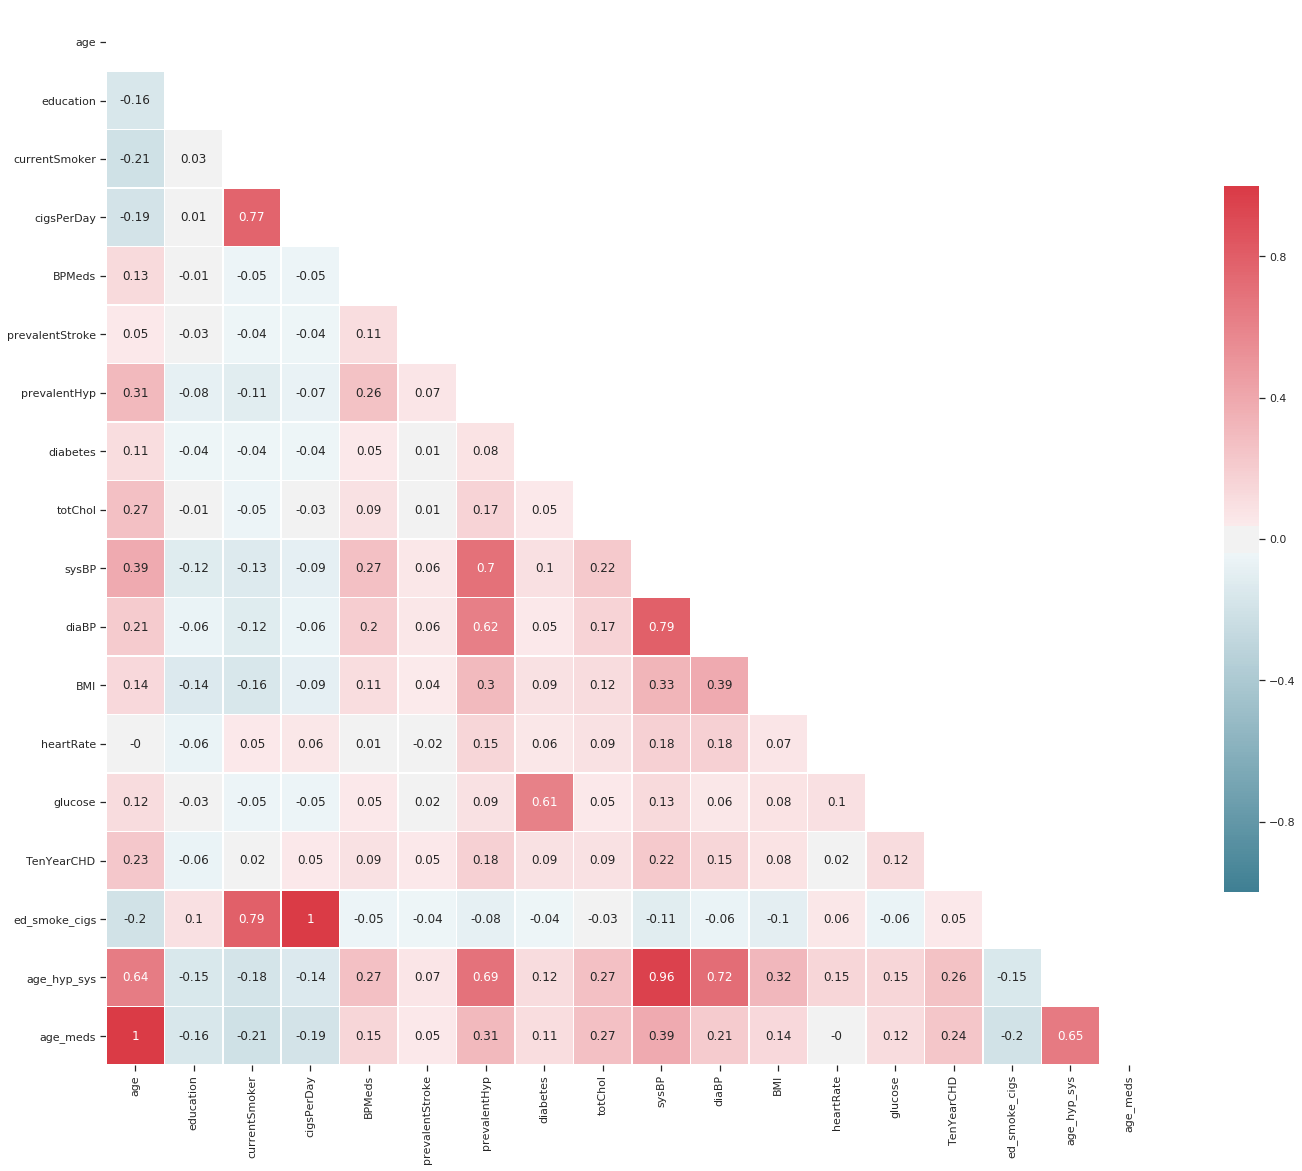

In [0]:
corr = data.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [0]:
data.drop(['age_meds'],axis=1,inplace=True)
data.drop(['ed_smoke_cigs'],axis=1,inplace=True)
# data.drop(['sysBP'],axis=1,inplace=True)

data.drop(['age_hyp_sys'],axis=1,inplace=True)


data.isnull().sum()
data.dropna(axis=0,inplace=True)
data.isnull().sum()

age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#**Logistic Regression**

In [0]:
from statsmodels.tools import add_constant as add_constant
data_constant = add_constant(data)
data_constant.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const  age  education  ...  heartRate  glucose  TenYearCHD
male                         ...                                
1       1.0   39        4.0  ...       80.0     77.0           0
0       1.0   46        2.0  ...       95.0     76.0           0
1       1.0   48        1.0  ...       75.0     70.0           0
0       1.0   61        3.0  ...       65.0    103.0           1
0       1.0   46        3.0  ...       85.0     85.0           0

[5 rows x 16 columns]

In [0]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(data)
heart_df_constant.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const  age  education  ...  heartRate  glucose  TenYearCHD
male                         ...                                
1       1.0   39        4.0  ...       80.0     77.0           0
0       1.0   46        2.0  ...       95.0     76.0           0
1       1.0   48        1.0  ...       75.0     70.0           0
0       1.0   61        3.0  ...       65.0    103.0           1
0       1.0   46        3.0  ...       85.0     85.0           0

[5 rows x 16 columns]

In [0]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(data.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.380070
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3643
Method:                           MLE   Df Model:                           14
Date:                Sun, 18 Aug 2019   Pseudo R-squ.:                  0.1091
Time:                        18:21:26   Log-Likelihood:                -1390.3
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 3.860e-64
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.8757      0.702    -11.214      0.000      -9.252      -6.499
age                 0.0656      0.007      9.790      0.000       0.052       0.079
education          -0.0458      0.050     -0.922      0.356      -0.143       0.052
currentSmoker       0.0635      0.155      0.409      0.683      -0.241       0.368
cigsPerDay          0.0261      0.006      4.357      0.000       0.014       0.038
BPMeds              0.1123      0.233      0.482      0.630      -0.345       0.569
prevalentStroke     0.7085      0.490      1.447      0.148      -0.251       1.668
prevalentHyp        0.2515      0.138      1.820      0.069      -0.019       0.522
diabetes            0.0822      0.315      0.261      0.794      -0.536       0.700
totChol             0.0016      0.001      1.413      0.158      -0.001       0.004
sysBP               0.0125      0.004      3.336      0.001       0.005       0.020
diaBP           -2.039e-05      0.006     -0.003      0.997      -0.013       0.012
BMI                 0.0084      0.013      0.671      0.502      -0.016       0.033
heartRate          -0.0059      0.004     -1.401      0.161      -0.014       0.002
glucose             0.0072      0.002      3.249      0.001       0.003       0.012
===================================================================================
"""

In [0]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3643
Method:                           MLE   Df Model:                           14
Date:                Sun, 18 Aug 2019   Pseudo R-squ.:                  0.1091
Time:                        18:21:26   Log-Likelihood:                -1390.3
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 3.860e-64
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.8757      0.702    -11.214      0.000      -9.252      -6.499
age                 0.0656      0.007      9.790      0.000       0.052       0.079
education          -0.0458      0.050     -0.922      0.356      -0.143       0.052
currentSmoker       0.0635      0.155      0.409      0.683      -0.241       0.368
cigsPerDay          0.0261      0.006      4.357      0.000       0.014       0.038
BPMeds              0.1123      0.233      0.482      0.630      -0.345       0.569
prevalentStroke     0.7085      0.490      1.447      0.148      -0.251       1.668
prevalentHyp        0.2515      0.138      1.820      0.069      -0.019       0.522
diabetes            0.0822      0.315      0.261      0.794      -0.536       0.700
totChol             0.0016      0.001      1.413      0.158      -0.001       0.004
sysBP               0.0125      0.004      3.336      0.001       0.005       0.020
diaBP           -2.039e-05      0.006     -0.003      0.997      -0.013       0.012
BMI                 0.0084      0.013      0.671      0.502      -0.016       0.033
heartRate          -0.0059      0.004     -1.401      0.161      -0.014       0.002
glucose             0.0072      0.002      3.249      0.001       0.003       0.012
===================================================================================
"""

# Creating test/train model 

In [0]:
import sklearn
from sklearn.model_selection import train_test_split
new_features=data
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#test model accuracy
sklearn.metrics.accuracy_score(y_test,y_pred)


0.8661202185792349

In [0]:
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.5368691817736404